In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from webweb import Web
import matplotlib
import matplotlib.pyplot as plt
from typing import Callable

from src import load, analyse, plotting
from src.load import load_basic_transfer_networks

In [2]:
df = analyse.get_league_scalar_measures([nx.reciprocity])
df.head()

,reciprocity
2000,0.405941
2001,0.397942
2002,0.418451
2003,0.485066
2004,0.456919


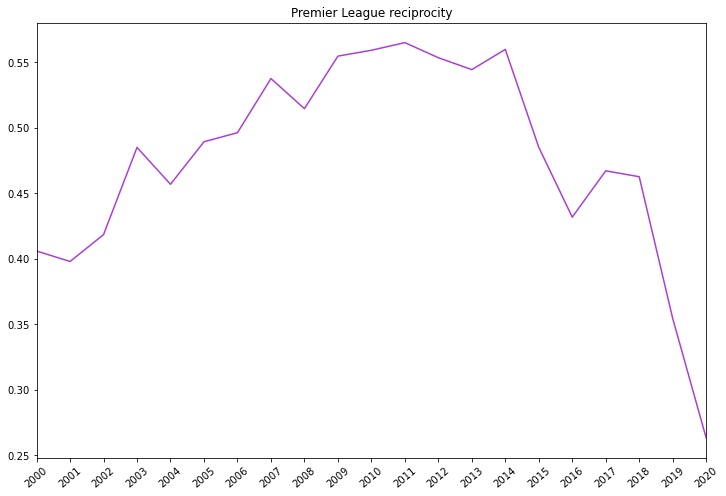

In [3]:
plotting.plot_league_avg_nx_fn_results('reciprocity', df)

In [7]:
rankings = load.season_rankings_prem_league()

In [9]:
start, end = 2000, 2016
df = analyse.get_league_avg_node_measure(nx.closeness_centrality, rankings=rankings, start_year=start, end_year=end)
df.head()

,Top 4,Bottom 3,avg,std
2000,0.207905,0.256064,0.231755,0.025834
2001,0.230665,0.241537,0.229164,0.030837
2002,0.205042,0.217474,0.220727,0.018494
2003,0.241266,0.249277,0.249254,0.013999
2004,0.232822,0.261084,0.252369,0.021782


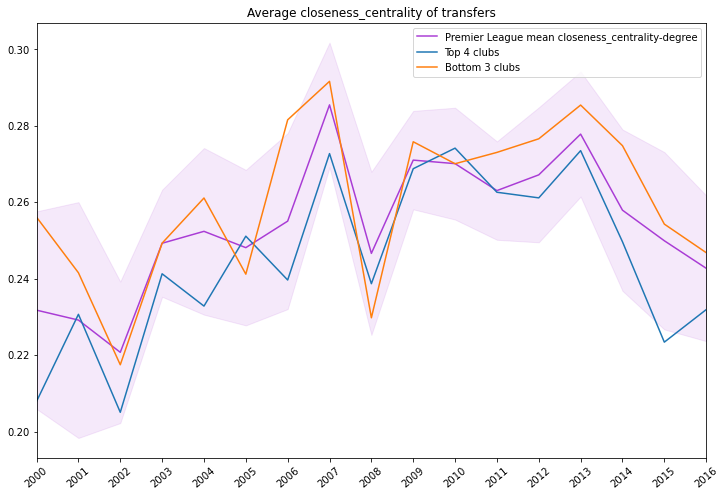

In [13]:
ax = plotting.plot_league_avg_measures(df, start_year=start, end_year=end)
ax.plot(df["Top 4"], label="Top 4 clubs")
ax.plot(df["Bottom 3"], label="Bottom 3 clubs")
ax.legend()

In [14]:
def get_league_avg_node_measure_rev(
    nx_fn: Callable,
    league: str = "english_premier_league",
    network_load_fn: Callable = load_basic_transfer_networks,
    rankings: dict = None,
    start_year: int = 2000,
    end_year: int = 2020,
) -> pd.DataFrame:
    """
    Apply a Networkx algorithm - one that takes a whole graph and outputs a
    value per node - to a league.

    If rankings supplied, will
    calculate averages for top 4 and bottom 3 teams.
    Args:
        nx_fn: Networkx function (e.g. nx.closeness_centrality)
        league: filename of league
        network_load_fn: a function to load network objects
        rankings: optionally include rankings
        start_year: start year
        end_year: year end

    Returns:
        df of mean and std for each measure
    """
    df = pd.DataFrame()
    tn_dict = network_load_fn(start_year, end_year, league=league)
    for year in range(start_year, end_year + 1):
        t = tn_dict.get(year)
        results = nx_fn(t.G.reverse())
        if rankings is not None:
            top_4 = list(rankings[year])[:5]
            bottom_3 = list(rankings[year])[-3:]
            df.loc[year, "Top 4"] = np.mean([results[c] for c in top_4])
            df.loc[year, "Bottom 3"] = np.mean([results[c] for c in bottom_3])
        df.loc[year, "avg"] = np.mean([results[c] for c in t.league_clubs])
        df.loc[year, "std"] = np.std([results[c] for c in t.league_clubs])
    df.name = nx_fn.__name__
    return df

In [16]:
df = get_league_avg_node_measure_rev(nx.closeness_centrality, rankings=rankings, start_year=start, end_year=end)
df.head()

,Top 4,Bottom 3,avg,std
2000,0.207842,0.239859,0.219768,0.017103
2001,0.220194,0.214832,0.220340,0.017487
2002,0.233003,0.207296,0.226251,0.022759
2003,0.255534,0.265798,0.260264,0.012588
2004,0.269682,0.264215,0.264068,0.016761


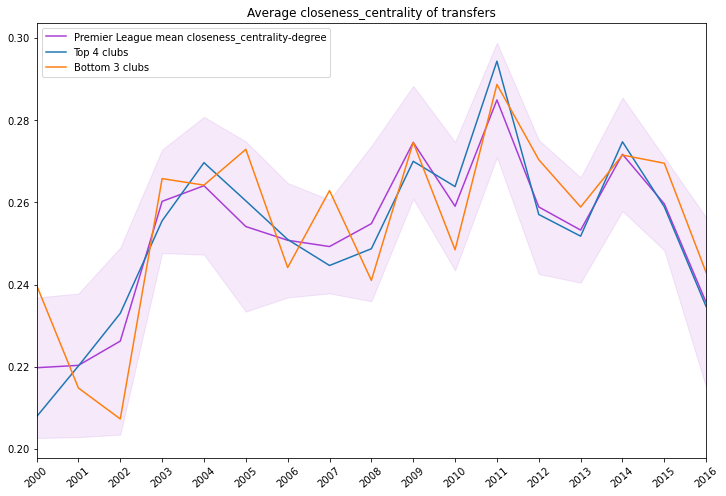

In [17]:
ax = plotting.plot_league_avg_measures(df, start_year=start, end_year=end)
ax.plot(df["Top 4"], label="Top 4 clubs")
ax.plot(df["Bottom 3"], label="Bottom 3 clubs")
ax.legend()